In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
data = pd.read_csv('Data2.csv')
print(data.tail())




    Tahun  nonseasional  seasional
32   1993         29174         49
33   1994         26498        101
34   1995         27562        151
35   1996         28409        204
36   1997         26442         51


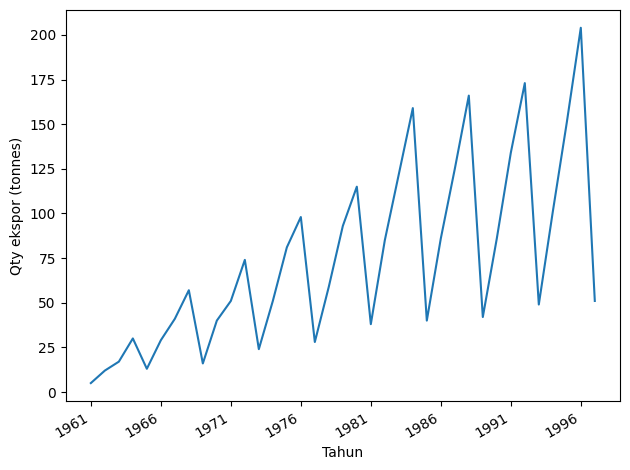

In [3]:
#hasil ((2026-1961)/5 harus sama dengan ((65-0)/5)), agar grafik dapat ditampilkan. nilai bisa diatur u menyesuaikan garis 


fig, ax = plt.subplots()

ax.plot(data['seasional'])
ax.set_xlabel('Tahun')
ax.set_ylabel('Qty ekspor (tonnes)')

plt.xticks(np.arange(0, 40, 5), np.arange(1961, 2001, 5))

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('time series plot.png', dpi=300)

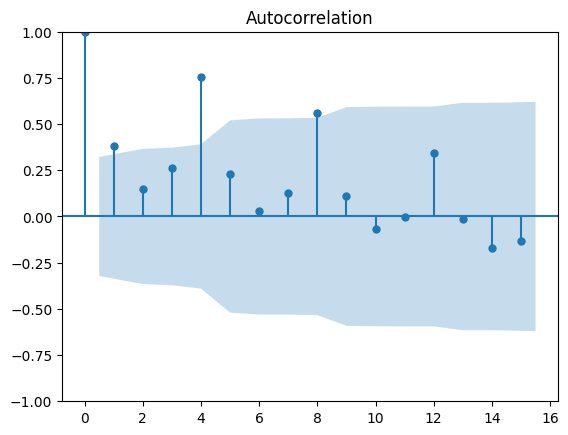

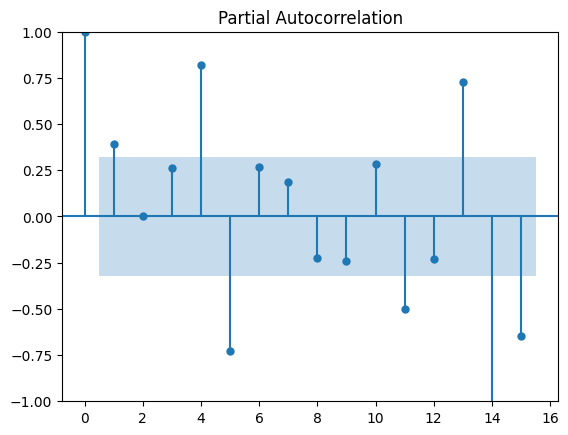

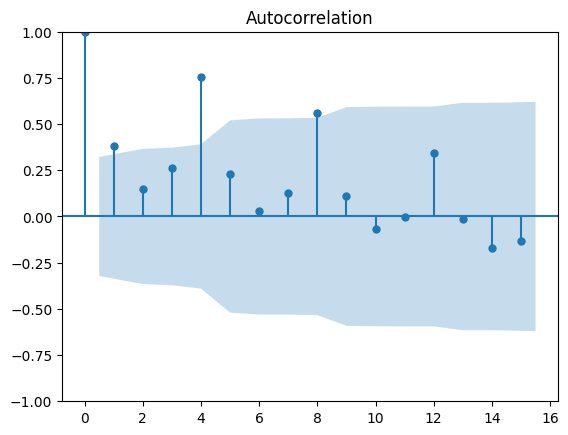

In [4]:
plot_pacf(data['seasional'],lags=15)
plot_acf(data['seasional'], lags=15)

In [ ]:
#data['export'] = np.log(data['export'])
data['nonseasional'] = data['nonseasional'].diff()

data = data.drop(data.index[0])

plot_pacf(data['nonseasional'], lags=29)
plot_acf(data['nonseasional'], lags=29)

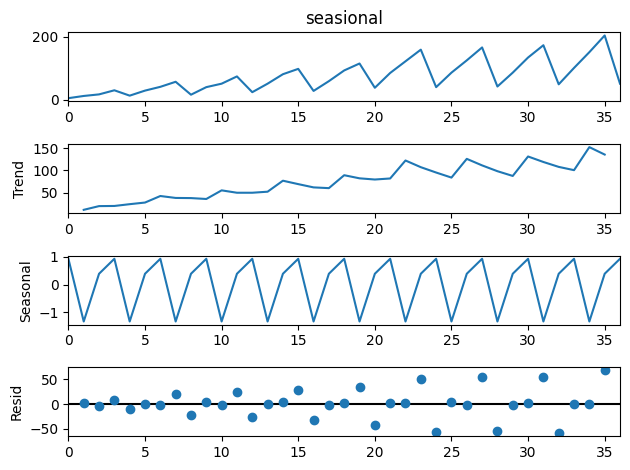

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(data['seasional'],model='additive', period=3)

decompose.plot()
plt.savefig('dekomposisi.png', dpi=100)
plt.show()

In [15]:
print(decompose.trend)
trend = pd.DataFrame(decompose.trend)

file_name = 'trend.xlsx'
# saving the excel
trend.to_excel(file_name)


0            NaN
1      11.333333
2      19.666667
3      20.000000
4      24.000000
5      27.666667
6      42.333333
7      38.000000
8      37.666667
9      35.666667
10     55.000000
11     49.666667
12     49.666667
13     52.000000
14     76.666667
15     69.000000
16     61.666667
17     60.000000
18     89.000000
19     82.000000
20     79.333333
21     81.666667
22    122.000000
23    107.000000
24     95.000000
25     83.666667
26    125.666667
27    111.000000
28     98.000000
29     87.333333
30    131.000000
31    118.666667
32    107.666667
33    100.333333
34    152.000000
35    135.333333
36           NaN
Name: trend, dtype: float64


In [20]:
print(decompose.seasonal)
print(decompose.resid)
print(decompose.observed)

0     0.934343
1    -1.328283
2     0.393939
3     0.934343
4    -1.328283
5     0.393939
6     0.934343
7    -1.328283
8     0.393939
9     0.934343
10   -1.328283
11    0.393939
12    0.934343
13   -1.328283
14    0.393939
15    0.934343
16   -1.328283
17    0.393939
18    0.934343
19   -1.328283
20    0.393939
21    0.934343
22   -1.328283
23    0.393939
24    0.934343
25   -1.328283
26    0.393939
27    0.934343
28   -1.328283
29    0.393939
30    0.934343
31   -1.328283
32    0.393939
33    0.934343
34   -1.328283
35    0.393939
36    0.934343
Name: seasonal, dtype: float64
0           NaN
1      1.994949
2     -3.060606
3      9.065657
4     -9.671717
5      0.939394
6     -2.267677
7     20.328283
8    -22.060606
9      3.398990
10    -2.671717
11    23.939394
12   -26.601010
13     0.328283
14     3.939394
15    28.065657
16   -32.338384
17    -1.393939
18     3.065657
19    34.328283
20   -41.727273
21     2.398990
22     1.328283
23    51.606061
24   -55.934343
25     3.66161